In [1]:
import numpy as np 
from Option import Option
from Dynamic_programming import Dynamic_pricing
from Monte_carlo import MonteCarlo_simulator

# Simulations

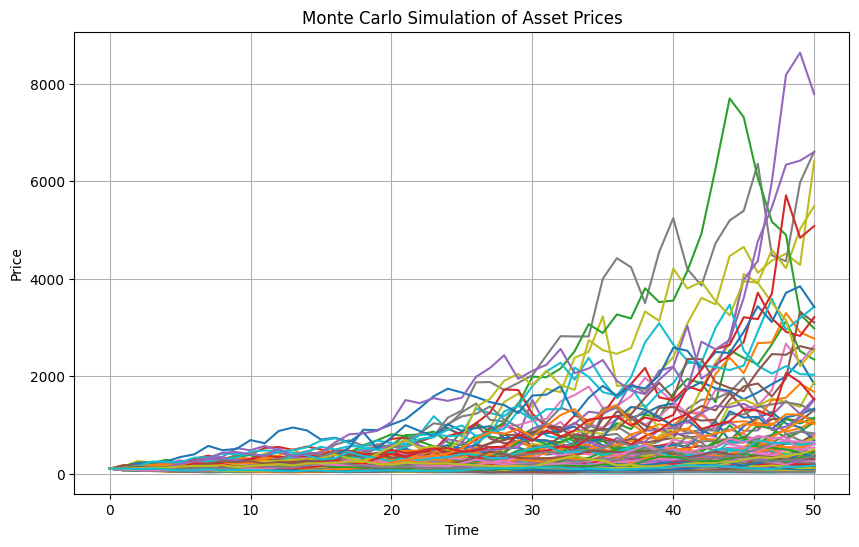

TypeError: MonteCarlo_simulator.monte_carlo_payoff_simulator() missing 1 required positional argument: 'price_simulation'

In [2]:
# def payoff_function(S):
#     return np.maximum(S - 100, 0)  # Example call option payoff function

def Projection_base(m, x):
    return x ** np.arange(1, m + 1)  # Polynomial projection base
def Projection_base_GBM(a,b, x):
    return x ** np.arange(1, m + 1)  # Polynomial projection base

# Create instance of DynamicPricing
r = 0.05
sigma = 0.2
S0 = 100
L = 50
n = 100
m = 50 # Degree of polynomial
a= 0.75
b=1.75
q=0.5

k=40
# Create Option object
call = Option(s0=S0, T=L, K=k, call=True)

# Create instance of MonteCarlo_simulator
Simulation = MonteCarlo_simulator(S0, L, n,r=r,sigma=sigma,model_type="GBM")

# Visualize price simulation
Simulation.visualisation_price()

# Simulate payoff
payoff_simulation = Simulation.monte_carlo_payoff_simulator(call.payoff)

# Pricing

In [ ]:
dynamic=Dynamic_pricing(S0, L, n,m,Projection_base,call.payoff,r=r,sigma=sigma,model_type="GBM")
u=dynamic.dynamic_prog_price()
print("Dynamic Pricing:", u)

Dynamic Pricing: 60


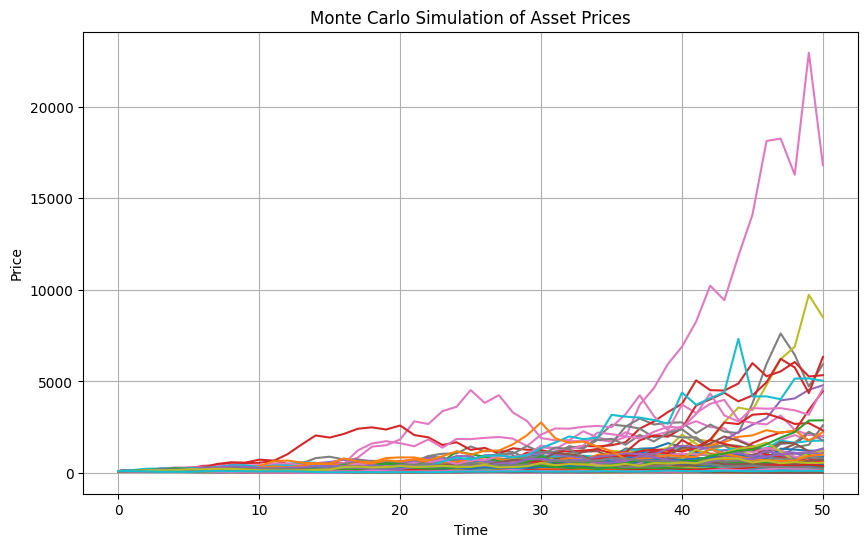

In [ ]:


#Visualize asset price simulation
Price_simulation = dynamic.monte_carlo_price_simulator()
dynamic.visualisation_price()

In [ ]:

import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Définition des paramètres
S = S0  # Prix actuel de l'actif sous-jacent
K = k  # Prix d'exercice de l'option
T = L / 365  # Temps jusqu'à l'expiration de l'option (en années)
r=r  # Taux d'intérêt sans risque
sigma = sigma  # Volatilité de l'actif sous-jacent

# Calcul du prix de l'option européenne d'achat (call) en utilisant le modèle Black-Scholes
call_price = black_scholes_call(S, K, T, r, sigma)

print("Le prix de l'option européenne d'achat (call) est :", call_price)



Le prix de l'option européenne d'achat (call) est : 60.273036478889985
